# Micro Credit Loan Use Case


# Problem Statement

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
loan = pd.read_csv ("C:/Users/admin/Downloads/Data file.csv")
loan

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


## EDA

In [3]:
loan.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [3]:
loan.tail(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209583,209584,1,30201I82732,935.0,15.550667,15.550667,140.44,140.44,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-02
209584,209585,0,70387I89237,945.0,0.000000,0.000000,78.30,78.30,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-06
209585,209586,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,...,6.0,0.0,5.0,30,6,0.0,5.2,5.200000,UPW,2016-07-04
209586,209587,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,...,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,UPW,2016-07-22
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,UPW,2016-08-02
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [4]:
loan.shape

(209593, 37)

In [5]:
loan.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
loan.isna().mean()

Unnamed: 0              0.0
label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle             

From the above anlaysis we can conclude that the data set has Unnamed column, which has no influence on the analysis.
Also column name 'msisdn' gives mobile number of user, wich is also unique and independent and has no influence on our analysis.
So we can drop these two columns.

label would be our target variable, as per our problem statement.

further viewing the dataset:
we can assume that the variable representing similar data for 30 days and 90 days may be ighly correlated, and one variable can be taken, we will visualize these variables.

Also we will check for the outliers in the data set.


In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

(array([ 26162.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 183431.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

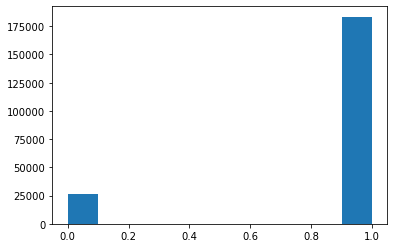

In [9]:
plt.hist(loan['label'])

from the above visualization we can see that dataset is not balanced and result may be biased toward Label ‘1’ indicates that the loan has been payed. we will try to balance the data set later on.

In [4]:
loan1=loan.drop(['Unnamed: 0','msisdn'],axis='columns')

In [9]:
loan1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'pdate'],
      dtype='object')

In [5]:
x=loan1.drop(columns='label')
y=loan1['label']

In [12]:
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE

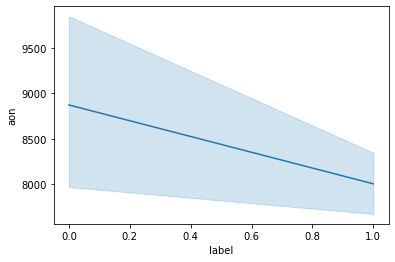

In [105]:
sns.lineplot(x="label",y="aon", data=loan1,markers=True)
plt.show()

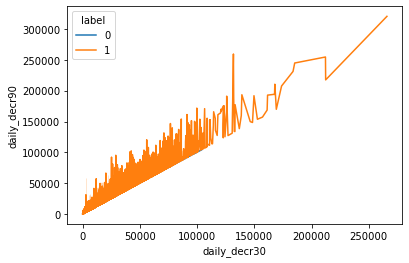

In [14]:
sns.lineplot(x="daily_decr30", y="daily_decr90", data=loan1,hue="label",markers=True)
plt.show()

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

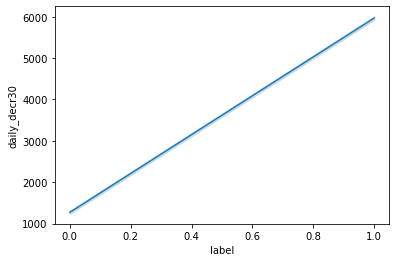

In [38]:
sns.lineplot( x="label",y="daily_decr30", data=loan1,markers=True)

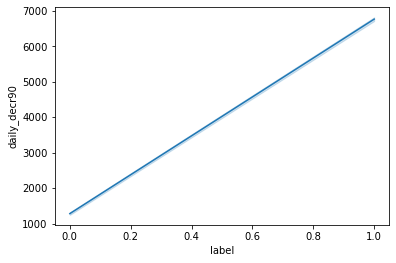

In [40]:
sns.lineplot(x="label",y="daily_decr90", data=loan1,markers=True)
plt.show()

Graph between Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) and Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) seems to be highly corelated and we can cosider amount spent for 90 days, as both will give same impact.

1. "daily_decr90" will be considered, as it will cover more number of days and give better result.


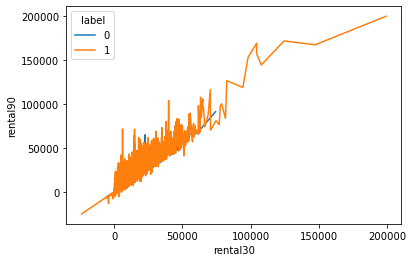

In [15]:
sns.lineplot(x="rental30", y="rental90", data=loan1,hue="label",markers=True)
plt.show()

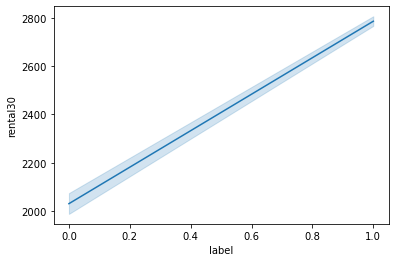

In [41]:
sns.lineplot( x="label",y="rental30", data=loan1,markers=True)
plt.show()

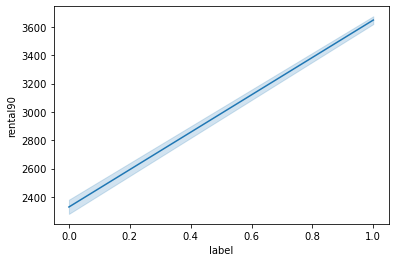

In [42]:
sns.lineplot(x="label",y="rental90", data=loan1,markers=True)
plt.show()

Plot between Average main account balance over last 30 days and Average main account balance over last 90 days seems to be highly correlated, so considering one attribute.

2. "rental90" will be considered

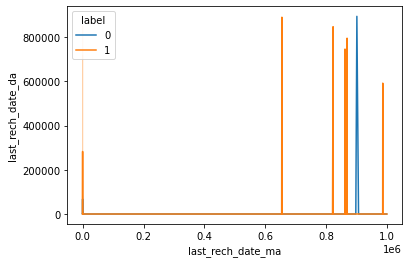

In [21]:
sns.lineplot(x="last_rech_date_ma", y="last_rech_date_da", data=loan1,hue="label",markers=True)
plt.show()

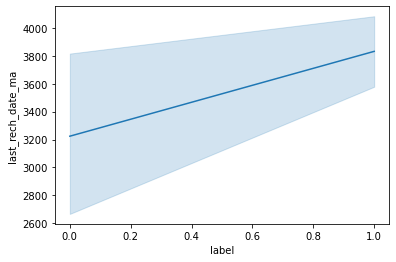

In [43]:
sns.lineplot(x="label",y="last_rech_date_ma", data=loan1,markers=True)
plt.show()

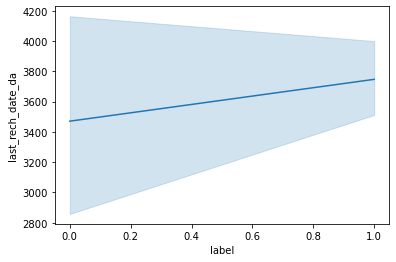

In [44]:
sns.lineplot(x="label",y="last_rech_date_da", data=loan1,markers=True)
plt.show()

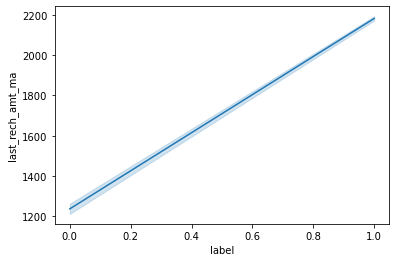

In [45]:
sns.lineplot(x="label",y="last_rech_amt_ma", data=loan1,markers=True)
plt.show()

plot between Number of days till last recharge of main account and Number of days till last recharge of data account gives variation.
Number of days till last recharge of data account has very slow increasing trend and can be ignored.
Number of days till last recharge of main account has increasing trend
Amount of last recharge of main account (in Indonesian Rupiah) is directly proportinal to te lable, more the amount recharge more the probability to return loan.

1."last_rech_date_ma"

2. "last_rech_amt_ma" both will be considered


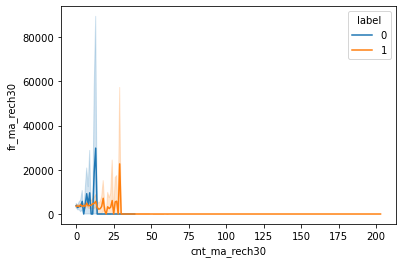

In [25]:
sns.lineplot(x="cnt_ma_rech30", y="fr_ma_rech30", data=loan1,hue="label",markers=True)
plt.show()

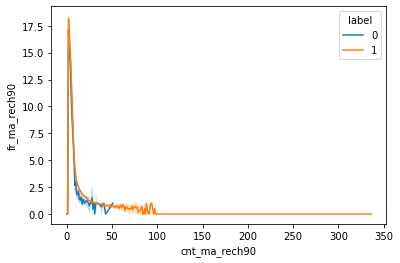

In [54]:
sns.lineplot(x="cnt_ma_rech90", y="fr_ma_rech90", data=loan1,hue="label",markers=True)
plt.show()

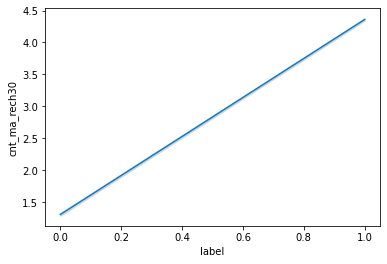

In [46]:
sns.lineplot(x="label",y="cnt_ma_rech30", data=loan1,markers=True)
plt.show()

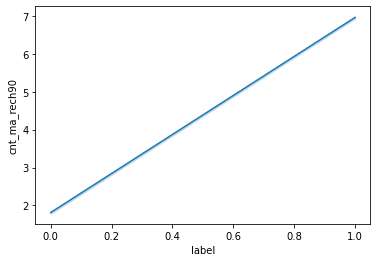

In [55]:
sns.lineplot(x="label",y="cnt_ma_rech90", data=loan1,markers=True)
plt.show()

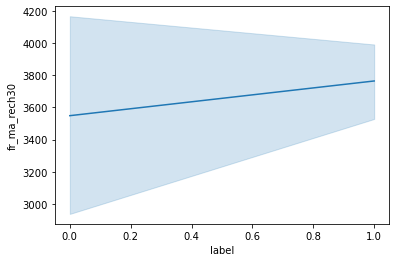

In [48]:
sns.lineplot(x="label",y="fr_ma_rech30", data=loan1,markers=True)
plt.show()

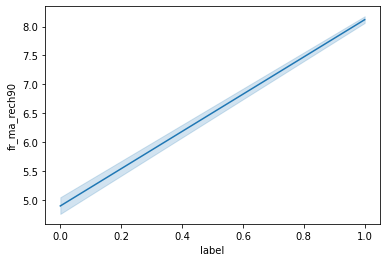

In [56]:
sns.lineplot(x="label",y="fr_ma_rech90", data=loan1,markers=True)
plt.show()

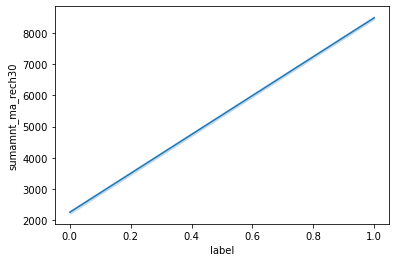

In [49]:
sns.lineplot(x="label", y="sumamnt_ma_rech30",data=loan1,markers=True)
plt.show()

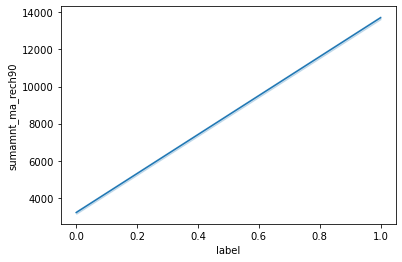

In [57]:
sns.lineplot(x="label", y="sumamnt_ma_rech90",data=loan1,markers=True)
plt.show()

plot  between Number of times main account got recharged in last 30 days and Frequency of main account recharged in last 30 days, gives similar trend but when plotted with label separately, "cnt_ma_rech30" is prominent feature.


Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) gives direct relation so it will be considered

simlarly the data set is plotted for 90 days and gives same trend.

so considering feature for 90 days:

1."cnt_ma_rech90"

2."fr_ma_rech90"

3. "sumamnt_ma_rech90"

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='medianmarechprebal30'>

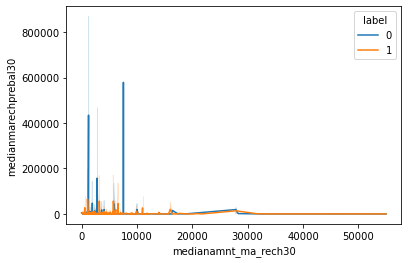

In [51]:
sns.lineplot(x="medianamnt_ma_rech30", y="medianmarechprebal30", data=loan1,hue="label",markers=True)

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='medianmarechprebal90'>

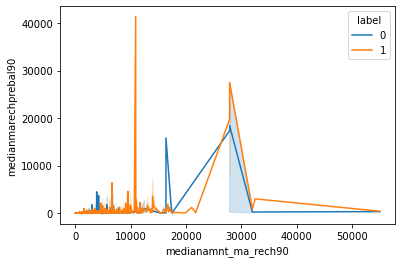

In [58]:
sns.lineplot(x="medianamnt_ma_rech90", y="medianmarechprebal90", data=loan1,hue="label",markers=True)

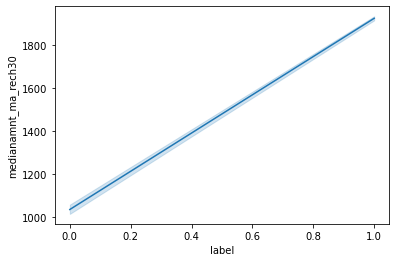

In [52]:
sns.lineplot(x="label", y="medianamnt_ma_rech30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

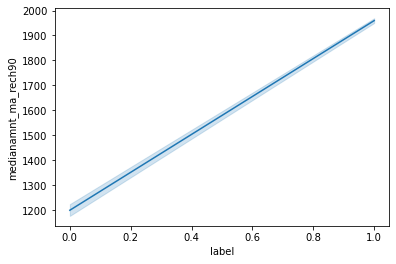

In [59]:
sns.lineplot(x="label", y="medianamnt_ma_rech90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal30'>

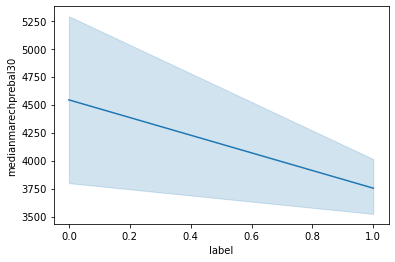

In [53]:
sns.lineplot(x="label", y="medianmarechprebal30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

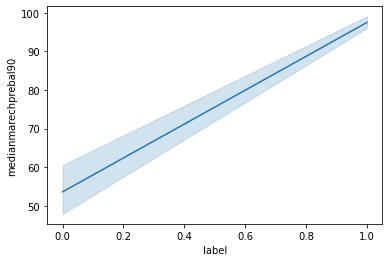

In [60]:
sns.lineplot(x="label", y="medianmarechprebal90",data=loan1,markers=True)

plot between Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) and Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) as similar trend.

"medianamnt_ma_rech30" is directly proportional, whereas "medianmarechprebal30" is inversely proportional.

similarly plot for 90 days.

"medianmarechprebal90" gives directly proportional treend, means te main account balance got recarged with in 90 days.

Again considering for 90 days features.

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech30'>

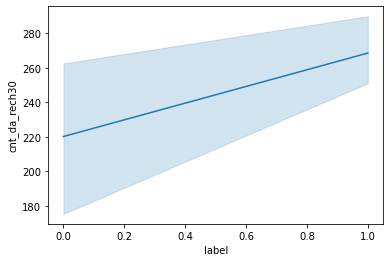

In [61]:
sns.lineplot(x="label", y="cnt_da_rech30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech90'>

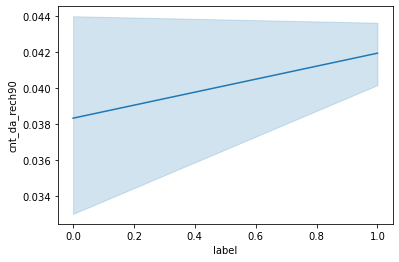

In [62]:
sns.lineplot(x="label", y="cnt_da_rech90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

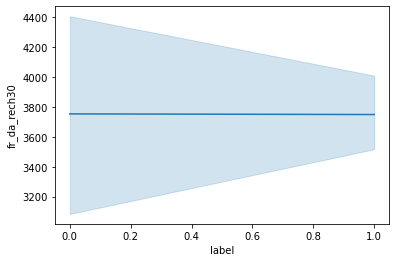

In [63]:
sns.lineplot(x="label", y="fr_da_rech30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='fr_da_rech90'>

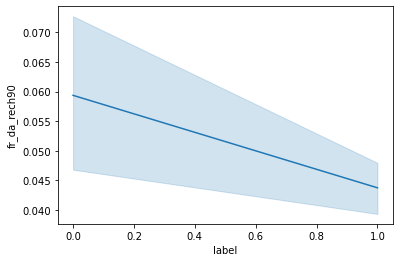

In [64]:
sns.lineplot(x="label", y="fr_da_rech90",data=loan1,markers=True)

Number of times data account got recharged in last 30 days- increasing 
Frequency of data account recharged in last 30 days- constant
Number of times data account got recharged in last 90 days- increasing
Frequency of data account recharged in last 90 days- decresing

considering:

cnt_da_rech90

fr_da_rech90


<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

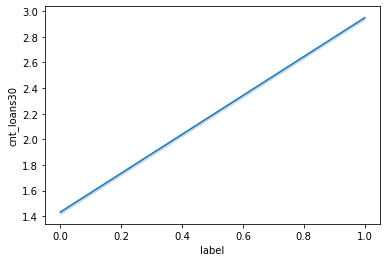

In [65]:
sns.lineplot(x="label", y="cnt_loans30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

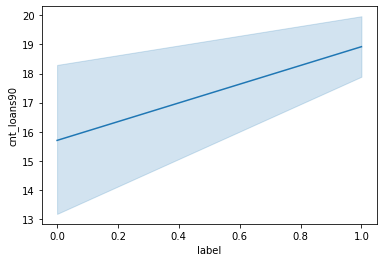

In [66]:
sns.lineplot(x="label", y="cnt_loans90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

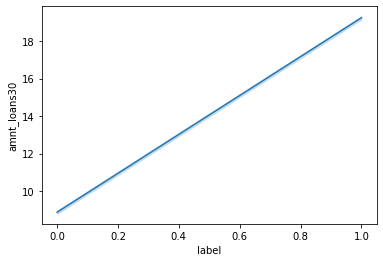

In [67]:
sns.lineplot(x="label", y="amnt_loans30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

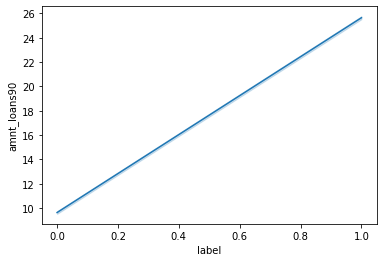

In [68]:
sns.lineplot(x="label", y="amnt_loans90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

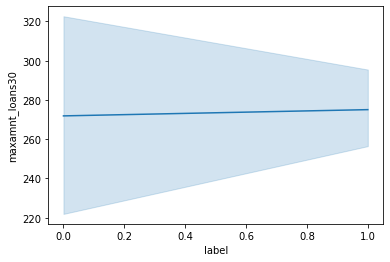

In [69]:
sns.lineplot(x="label", y="maxamnt_loans30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

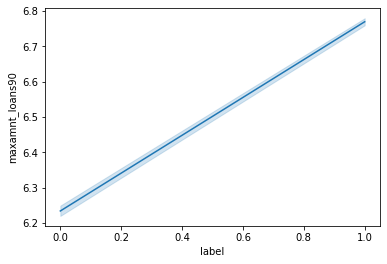

In [70]:
sns.lineplot(x="label", y="maxamnt_loans90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

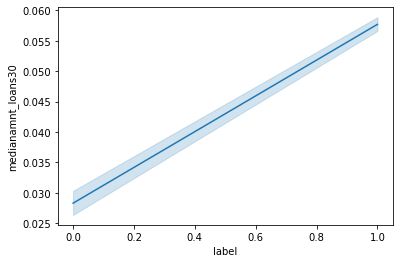

In [71]:
sns.lineplot(x="label", y="medianamnt_loans30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

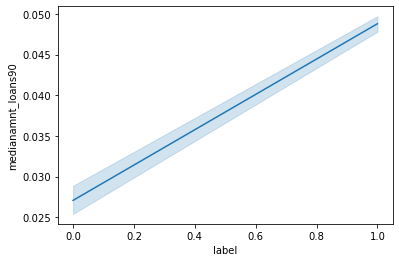

In [72]:
sns.lineplot(x="label", y="medianamnt_loans90",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='payback30'>

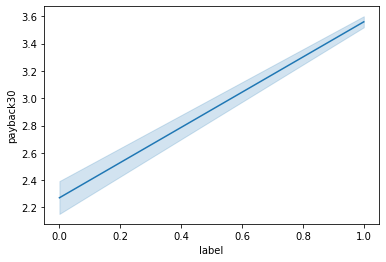

In [73]:
sns.lineplot(x="label", y="payback30",data=loan1,markers=True)

<AxesSubplot:xlabel='label', ylabel='payback90'>

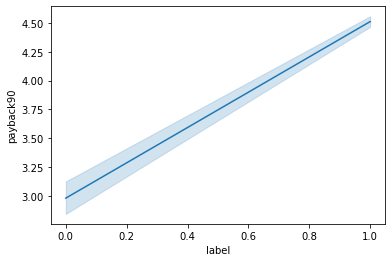

In [74]:
sns.lineplot(x="label", y="payback90",data=loan1,markers=True)

In [106]:
loan['pcircle'].unique

<bound method Series.unique of 0         UPW
1         UPW
2         UPW
3         UPW
4         UPW
         ... 
209588    UPW
209589    UPW
209590    UPW
209591    UPW
209592    UPW
Name: pcircle, Length: 209593, dtype: object>

<AxesSubplot:xlabel='pcircle', ylabel='label'>

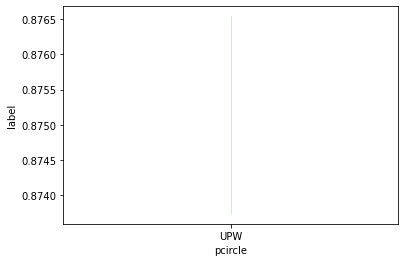

In [107]:
sns.lineplot(x="pcircle", y="label",data=loan1,markers=True)

<AxesSubplot:xlabel='pdate', ylabel='label'>

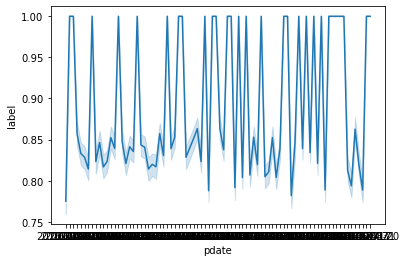

In [108]:
sns.lineplot(x="pdate", y="label",data=loan1,markers=True)

In [109]:
loan['pdate'].unique

<bound method Series.unique of 0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    2016-06-17
209589    2016-06-12
209590    2016-07-29
209591    2016-07-25
209592    2016-07-07
Name: pdate, Length: 209593, dtype: object>

After analysing the data, it has been seen that the data set is distributed for 30 days and 90 days and representing majorly same relationsip. 

pcircle has same value so it can be dropped. And date parameter as no direct relationsip with label  so it can be dropped.

In [6]:
loan_1=loan1.drop(['daily_decr30','rental30',"last_rech_date_da",
        'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'payback30',
       'pcircle', 'pdate'],axis='columns')

In [112]:
loan_1.shape

(209593, 18)

In [113]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental90              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_amt_ma      209593 non-null  int64  
 6   cnt_ma_rech90         209593 non-null  int64  
 7   fr_ma_rech90          209593 non-null  int64  
 8   sumamnt_ma_rech90     209593 non-null  int64  
 9   medianamnt_ma_rech90  209593 non-null  float64
 10  medianmarechprebal90  209593 non-null  float64
 11  cnt_da_rech90         209593 non-null  int64  
 12  fr_da_rech90          209593 non-null  int64  
 13  cnt_loans90           209593 non-null  float64
 14  amnt_loans90          209593 non-null  int64  
 15  

In [114]:
loan_1.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,6082.515068,3483.406534,3755.847800,2064.452797,6.31543,7.716780,12396.218352,1864.595821,92.025541,0.041495,0.045712,18.520919,23.645398,6.703134,0.046077,4.321485
std,0.330519,75696.082531,10918.812767,5770.461279,53905.892230,2370.786034,7.19347,12.590251,16857.793882,2081.680664,369.215658,0.397556,0.951386,224.797423,26.469861,2.103864,0.200692,10.308108
min,0.000000,-48.000000,-93.012667,-24720.580000,-29.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.692000,300.260000,1.000000,770.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,1539.000000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,2309.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,999860.755168,320630.000000,200148.110000,998650.377733,55000.000000,336.00000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


In [104]:
loan_1.skew()

daily_decr90             4.252565
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90                6.899951
dtype: float64

<AxesSubplot:xlabel='aon'>

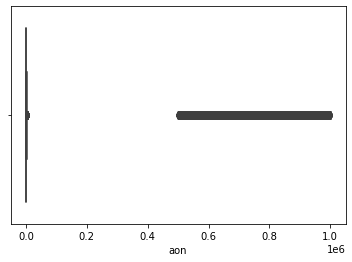

In [134]:
import warnings
warnings.simplefilter("ignore")
sns.boxplot(loan_1['aon'])

<AxesSubplot:xlabel='daily_decr90'>

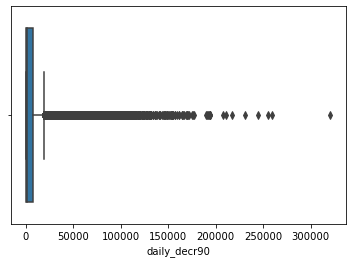

In [135]:
sns.boxplot(loan_1['daily_decr90'])

<AxesSubplot:xlabel='rental90'>

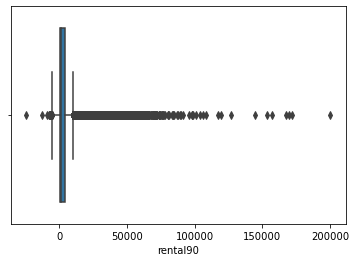

In [136]:
sns.boxplot(loan_1['rental90'])

<AxesSubplot:xlabel='last_rech_date_ma'>

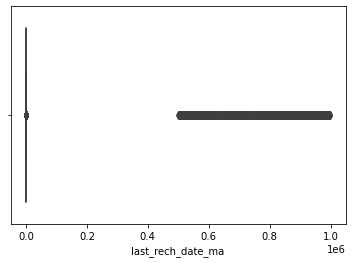

In [137]:
sns.boxplot(loan_1['last_rech_date_ma'])

<AxesSubplot:xlabel='last_rech_amt_ma'>

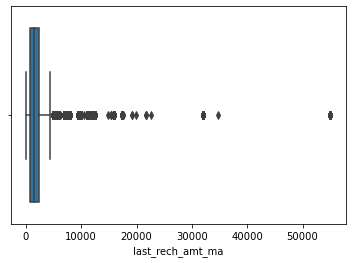

In [138]:
sns.boxplot(loan_1['last_rech_amt_ma'])

<AxesSubplot:xlabel='cnt_ma_rech90'>

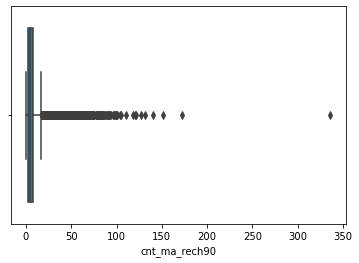

In [139]:
sns.boxplot(loan_1['cnt_ma_rech90'])

<AxesSubplot:xlabel='fr_ma_rech90'>

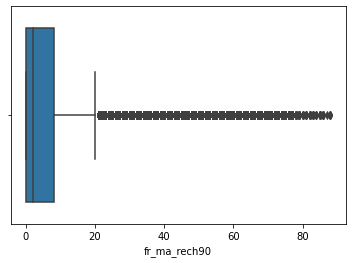

In [140]:
sns.boxplot(loan_1['fr_ma_rech90'])

<AxesSubplot:xlabel='sumamnt_ma_rech90'>

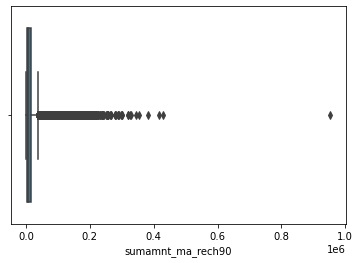

In [141]:
sns.boxplot(loan_1['sumamnt_ma_rech90'])

<AxesSubplot:xlabel='medianamnt_ma_rech90'>

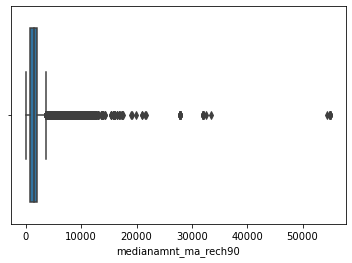

In [142]:
sns.boxplot(loan_1['medianamnt_ma_rech90'])

<AxesSubplot:xlabel='medianmarechprebal90'>

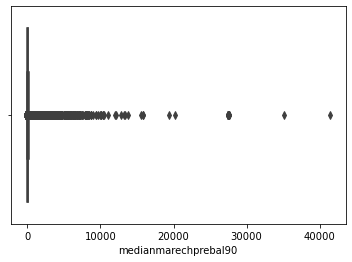

In [143]:
sns.boxplot(loan_1['medianmarechprebal90'])

<AxesSubplot:xlabel='cnt_da_rech90'>

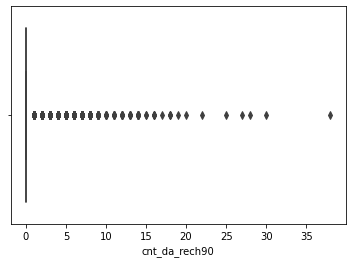

In [144]:
sns.boxplot(loan_1['cnt_da_rech90'])

<AxesSubplot:xlabel='fr_da_rech90'>

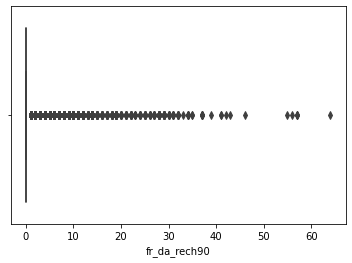

In [145]:
sns.boxplot(loan_1['fr_da_rech90'])

<AxesSubplot:xlabel='cnt_loans90'>

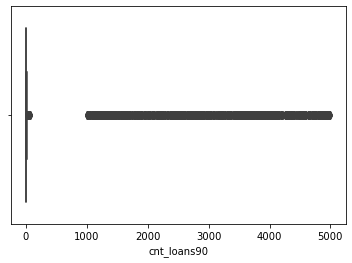

In [146]:
sns.boxplot(loan_1['cnt_loans90'])

<AxesSubplot:xlabel='amnt_loans90'>

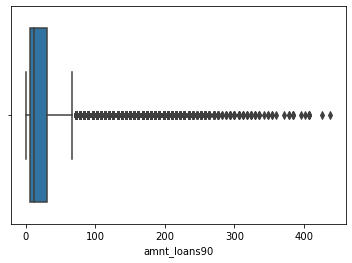

In [147]:
sns.boxplot(loan_1['amnt_loans90'])

<AxesSubplot:xlabel='maxamnt_loans90'>

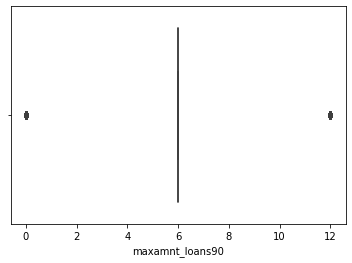

In [148]:
sns.boxplot(loan_1['maxamnt_loans90'])

<AxesSubplot:xlabel='medianamnt_loans90'>

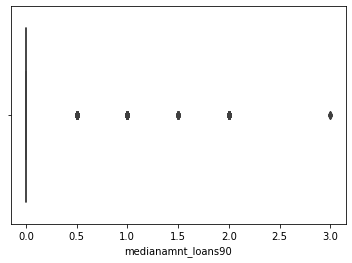

In [149]:
sns.boxplot(loan_1['medianamnt_loans90'])

<AxesSubplot:xlabel='payback90'>

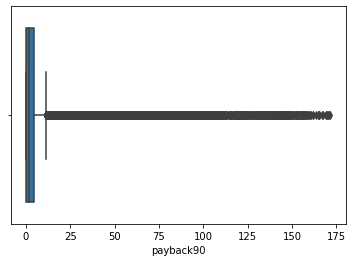

In [150]:
sns.boxplot(loan_1['payback90']) 

From above analysis it can be seen that tere are lot of outliers and skewness. Using z score to remove skewness.

In [206]:
loan_1.corr()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
label,1.000000,-0.003785,0.166150,0.075521,0.003728,0.131804,0.236392,0.084385,0.205793,0.120855,0.039300,0.002999,-0.005418,0.004733,0.199788,0.084144,0.035747,0.049183
aon,-0.003785,1.000000,0.000374,-0.000790,0.001692,0.004256,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001121,0.005395,-0.000611,-0.002319,-0.001191,0.002771,0.002203
daily_decr90,0.166150,0.000374,1.000000,0.471730,0.000908,0.264131,0.593069,-0.079530,0.768817,0.250518,0.036382,0.031155,0.016437,0.009446,0.567204,0.397251,-0.034686,0.040800
rental90,0.075521,-0.000790,0.471730,1.000000,-0.001688,0.121416,0.345293,-0.036524,0.360601,0.103151,0.029547,0.056282,0.036886,0.005141,0.327436,0.251029,-0.034122,0.099501
last_rech_date_ma,0.003728,0.001692,0.000908,-0.001688,1.000000,-0.000147,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003538,-0.002395,-0.000225,0.000870,-0.001123,0.002771,-0.001583
last_rech_amt_ma,0.131804,0.004256,0.264131,0.121416,-0.000147,1.000000,0.016707,0.106267,0.418735,0.818734,0.124646,0.014779,0.016042,0.000093,0.014067,0.148460,0.021004,-0.014260
cnt_ma_rech90,0.236392,-0.002725,0.593069,0.345293,0.004263,0.016707,1.000000,-0.149068,0.687054,-0.035497,0.015461,0.004090,0.002865,0.015754,0.783419,0.244602,-0.072481,-0.003141
fr_ma_rech90,0.084385,0.004401,-0.079530,-0.036524,0.001414,0.106267,-0.149068,1.000000,-0.065566,0.138503,0.004347,-0.006727,-0.003822,-0.002756,-0.132035,-0.045780,0.016964,0.077529
sumamnt_ma_rech90,0.205793,0.001011,0.768817,0.360601,0.002243,0.418735,0.687054,-0.065566,1.000000,0.429274,0.096385,0.012465,0.013136,0.011306,0.562609,0.321739,-0.042386,-0.029997
medianamnt_ma_rech90,0.120855,0.004909,0.250518,0.103151,-0.000726,0.818734,-0.035497,0.138503,0.429274,1.000000,0.209096,0.017533,0.019677,-0.000123,-0.023450,0.134139,0.031696,-0.023022


<AxesSubplot:>

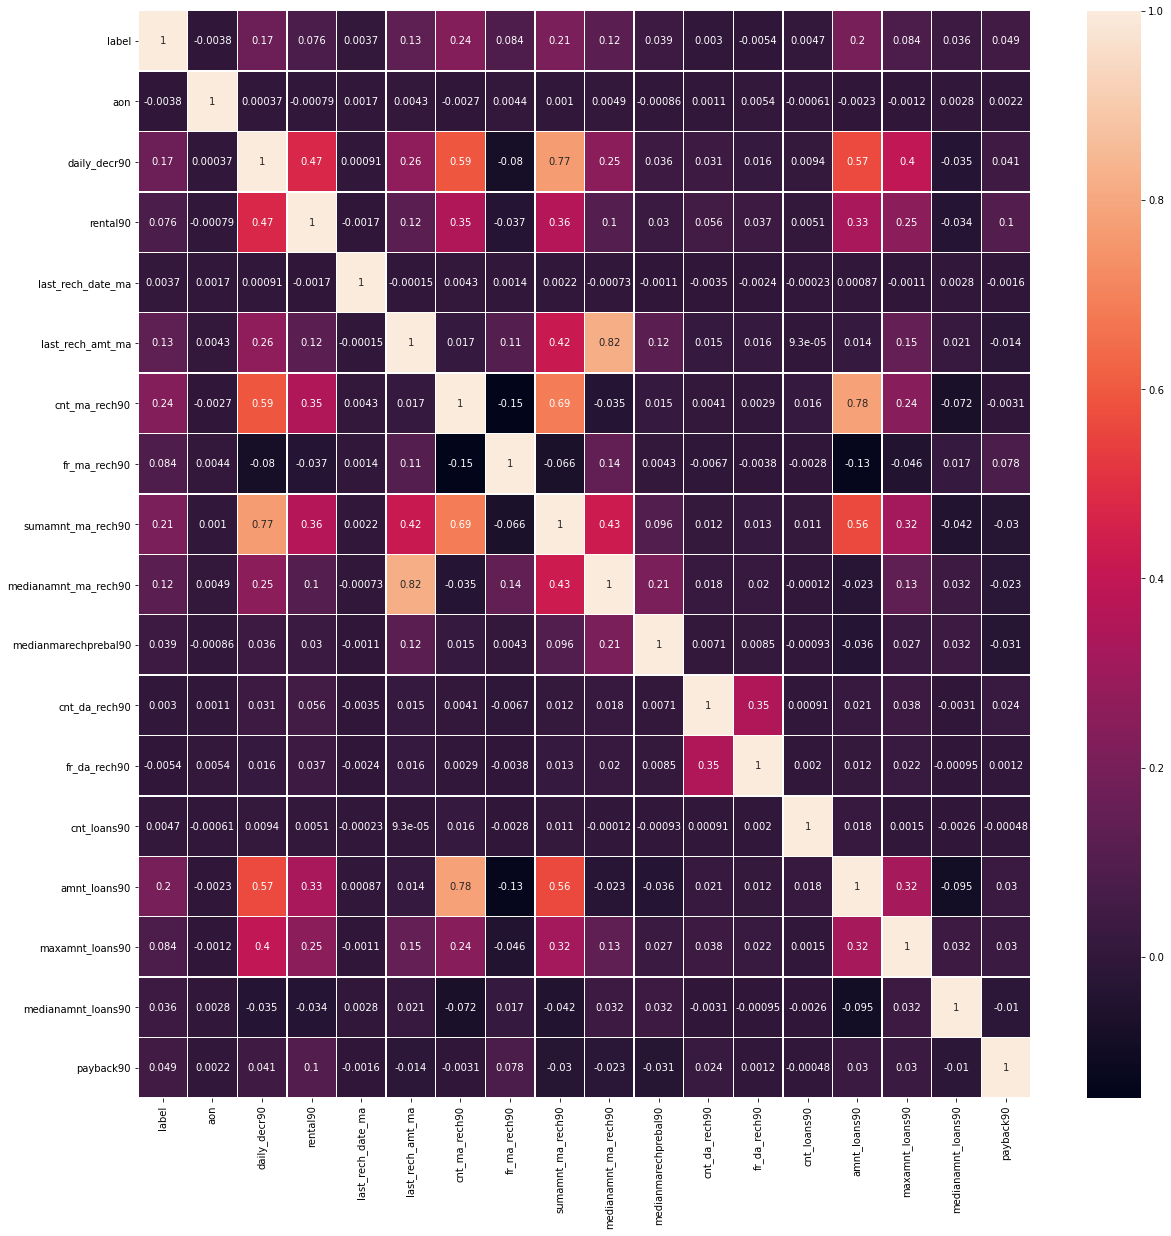

In [207]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(loan_1.corr(),annot=True, linewidth=0.5,)

following attributes are highly correlated, so considering one of them in data set:

'amnt_loans90' and 'cnt_ma_rech90'

'last_rech_amt_ma' and 'medianamnt_ma_rech90'

'sumamnt_ma_rech90' and 'daily_decr90'

In [7]:
data=loan_1.drop(['amnt_loans90','last_rech_amt_ma','sumamnt_ma_rech90','fr_da_rech90'],axis='columns')

In [8]:
data.shape

(209593, 14)

In [9]:
data.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'cnt_ma_rech90', 'fr_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'cnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

In [10]:
from scipy.stats import zscore
import numpy as np 
z_score=zscore(data[['aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'cnt_ma_rech90', 'fr_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'cnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback90']])


In [11]:
abs_z_score=np.abs(z_score)

In [12]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [13]:
data=data[filtering_entry]

In [14]:
data.shape

(175372, 14)

In [15]:
data.skew()

label                  -2.154101
aon                     0.954857
daily_decr90            2.053916
rental90                2.220847
last_rech_date_ma       3.151785
cnt_ma_rech90           1.366559
fr_ma_rech90            2.023122
medianamnt_ma_rech90    2.309721
medianmarechprebal90    3.672768
cnt_da_rech90           6.897466
cnt_loans90             2.013161
maxamnt_loans90         2.510045
medianamnt_loans90      5.807320
payback90               2.707874
dtype: float64

Now using SMOTE to balance the data by oversampling.

In [16]:
x=data.drop(columns='label')
y=data['label']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [20]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [21]:
print('After OverSampling, the shape of train_X: {}'.format(x_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (227726, 13)
After OverSampling, the shape of train_y: (227726,) 

After OverSampling, counts of label '1': 113863
After OverSampling, counts of label '0': 113863


In [22]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [23]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.020301,aon
1,2.233867,daily_decr90
2,1.396067,rental90
3,1.092533,last_rech_date_ma
4,3.012904,cnt_ma_rech90
5,1.077363,fr_ma_rech90
6,1.254135,medianamnt_ma_rech90
7,1.088260,medianmarechprebal90
8,1.004492,cnt_da_rech90
9,2.714637,cnt_loans90


# Building Machine Learning Models

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(x_res, y_res)

LogisticRegression()

In [41]:
y_predict_test = classifier.predict(x_test)

In [42]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[ 4594,  1167],
       [10072, 28010]], dtype=int64)

In [43]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.31      0.80      0.45      5761
           1       0.96      0.74      0.83     38082

    accuracy                           0.74     43843
   macro avg       0.64      0.77      0.64     43843
weighted avg       0.88      0.74      0.78     43843



In [44]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val=cross_val_score(classifier, x,y,cv=7)
cross_val.mean()

0.8675729334548363

In [45]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_search = GridSearchCV(classifier, param_grid=param)

In [46]:
grid_result = grid_search.fit(x_res, y_res)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 1}


In [47]:
regress=LogisticRegression(C=1)
regress.fit(x_res, y_res)

LogisticRegression(C=1)

In [48]:
y_predict_t = regress.predict(x_test)

In [49]:
accuracy_score(y_test, y_predict_t)

0.7436534908651324

In [50]:
cm1 = confusion_matrix(y_test, y_predict_t)
cm1

array([[ 4594,  1167],
       [10072, 28010]], dtype=int64)

In [51]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.31      0.80      0.45      5761
           1       0.96      0.74      0.83     38082

    accuracy                           0.74     43843
   macro avg       0.64      0.77      0.64     43843
weighted avg       0.88      0.74      0.78     43843



## Accuracy 74%

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf=RandomForestClassifier()
clf.fit(x_res,y_res)

RandomForestClassifier()

In [26]:
y_pr=clf.predict(x_test)

In [29]:
accuracy_score(y_test, y_pr)

0.8945327646374563

In [30]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5761
           1       0.94      0.94      0.94     38082

    accuracy                           0.89     43843
   macro avg       0.77      0.77      0.77     43843
weighted avg       0.89      0.89      0.89     43843



In [31]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[ 3430,  2331],
       [ 2293, 35789]], dtype=int64)

In [37]:
cross_val=cross_val_score(clf, x,y,cv=7)
cross_val.mean()

0.9092044379195992

In [39]:
a=np.array(y_test)
lr=np.array(classifier.predict(x_test))
rf=np.array(clf.predict(x_test))
df_loan=pd.DataFrame({'original':a,'Predicted_lr':lr,'pred_rf':rf})
df_loan.head(50)

,original,Predicted_lr,pred_rf
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,0
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1
9,1,0,1


<AxesSubplot:>

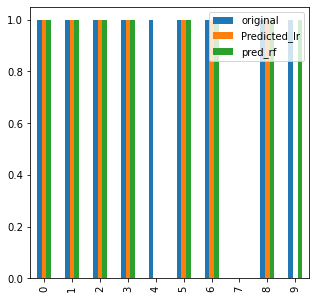

In [54]:
df_loan.head(10).plot.bar(figsize=(5,5))